<a href="https://colab.research.google.com/github/naskar002/Machine-Learning-Projects/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
import numpy as np

class LogisticRegressor:
    def __init__(self, learning_rate = 0.01, epochs=100000, fit_bias=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.fit_bias = fit_bias

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def fit(self, X, y):
        if self.fit_bias:
            X = self.__add_intercept(X)

        self.m, self.n = X.shape
        self.w = np.zeros(self.n)

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        z = np.dot(X, self.w)
        h = self.__sigmoid(z)
        gradient = (1 / X.shape[0]) * np.dot(X.T, (h - y))
        self.w -= self.learning_rate * gradient

    def predict_proba(self, X):
        if self.fit_bias:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X):
        return self.predict_proba(X).round()


In [19]:
df= pd.read_csv('/content/drive/MyDrive/datasets (1)/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'],stratify = df['Outcome'], test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using our logistic Regression

In [42]:
model = LogisticRegressor(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

In [43]:
pred = model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred)

0.7280130293159609

In [48]:
from sklearn.metrics import confusion_matrix
confusion_1 = confusion_matrix(y_train, pred)

# Importing logistic Regression from sklearn

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
predict = lr.predict(X_train)
accuracy_score(y_train, predict)

0.7915309446254072

In [51]:
confusion_2 = confusion_matrix(y_train, predict)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix of our logistic regression

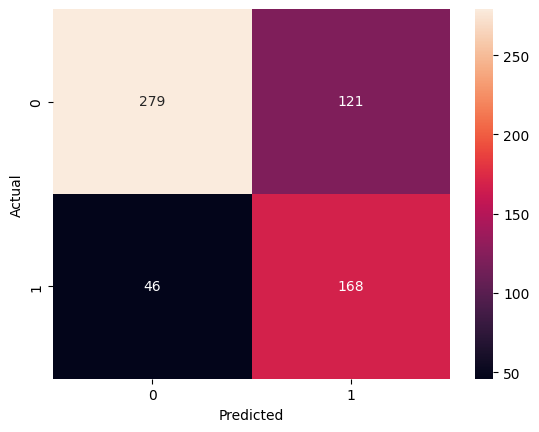

In [54]:
sns.heatmap(confusion_1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix of sklearn logistic regression

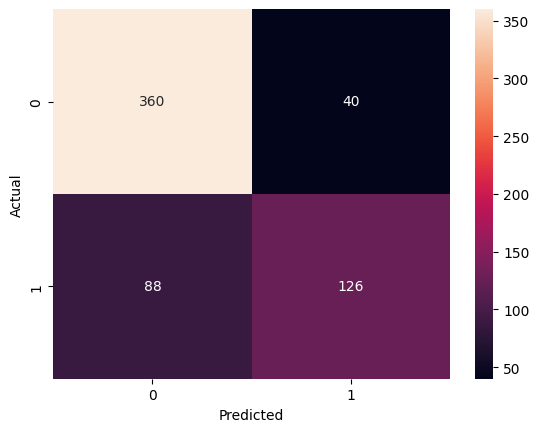

In [55]:
sns.heatmap(confusion_2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()